<div align="center">
    <h1>2025 Postdoc Conference</h1>
</div>

**Autor**: Adolfo Fuentes Jofré, PhD(c)

## Hands-on: Building Predictive Models for Behavior Using Supervised and Unsupervised Machine Learning Techniques

This notebook provides a practical guide to building predictive models focused on political behavior using supervised and unsupervised learning techniques. It is organized in sequential steps, covering everything from data loading to model evaluation. Below is a summary of its content:

1. **Introduction to the Problem and Tools**  

   The general objective is introduced: modeling political behavior using machine learning tools. Key libraries such as pandas, scikit-learn, and others necessary for analysis and modeling are highlighted.  
   <br>

2. **Data Preparation**  

   - **Load the data**: Import datasets relevant to political analysis.  
   - **General overview of the data**: Explore and gain an initial understanding of the features.  
   - **Creation of political classes**: Classify the data into relevant political categories for the modeling goals.  
   <br>

3. **Descriptive Analysis**  

   - Perform statistical analyses to understand patterns and relationships in the data.  
   <br>

4. **Preprocessing**  

   - Transform and clean the data, including preparing features for use in machine learning algorithms.  
   <br>

5. **Supervised Modeling**  

   - Train models such as Support Vector Machines (SVM), Decision Trees (DT), and Random Forests (RF).  
   - **Performance evaluation**: Use metrics such as confusion matrix, accuracy, recall, ROC curve, and area under the curve (AUC).  
   <br>

6. **Validation and Generalization**  

   - Emphasize avoiding overfitting through validation strategies such as train-test split.  
   <br>

7. **Feature Engineering**  

   - Create and select relevant variables to improve model performance.  
   <br>

8. **Final Model Selection**  

   - Compare trained models to identify the most suitable one based on performance metrics.  
   <br>

### Main Goal:

The goal of this notebook is to provide both practical skills and theoretical knowledge for building predictive models in the political domain, with an emphasis on predicting political behavior using structured data and machine learning algorithms.




# Table of Contents:

1. **Import Required Libraries**  
2. **Load the Data**  
3. **Data Overview**  
4. **Creation of Political Classes**  
5. **Descriptive Statistics**  
6. **Supervised Machine Learning – Preprocessing**  
7. **Supervised Machine Learning – Binary Classification**  
   - **Train-Test Split**  
8. **Generalization and the Importance of Validation**  
9. **Models**  
    - **Support Vector Machine (SVM)**  
    - **Decision Tree (DT)**  
    - **Random Forest (RF)**  
    - **Evaluation of Classification Models**  
      - **Confusion Matrix and Performance Metrics**  
      - **Structure of the Confusion Matrix**  
      - **Performance Metrics**  
      - **Selecting Random Forest (RF)**  
      - **ROC Curve & AUC**  
10. **Feature Engineering**  

# 1. Importar bibliotecas necesarias 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import argparse
import json
import sys
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
#import shap
from scipy.interpolate import make_interp_spline
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# 2. Load the Data

In [3]:
# Load the dataset and display the first rows to understand its structure

df = pd.read_csv('Data/Voters.csv')

In [4]:
# Display the first rows
df.head()


,ID,sex,age,region,politica,region_custom,age_gen,z1,z2
0,0,Masculino,27,Biobío,2,Region,Millennial,0.572108,0.215063
1,1,Masculino,43,Metropolitana de Santiago,6,Capital City,Generation X,0.633335,0.264999
2,2,Femenino,39,Metropolitana de Santiago,3,Capital City,Generation X,0.499945,0.462515
3,3,Masculino,34,Metropolitana de Santiago,6,Capital City,Millennial,0.152297,0.382331
4,5,Femenino,37,Metropolitana de Santiago,0,Capital City,Millennial,0.288385,0.269820


# 3. Data Overview


Describe the basic structure of the dataset, including the total number of rows and columns.

In [5]:
print("Total data (rows, columns):", df.shape)

Total data (rows, columns): (21528, 9)


Count and display the total number of NaN values in each column.

In [6]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 ID               0
sex              0
age              0
region           0
politica         0
region_custom    0
age_gen          0
z1               0
z2               0
dtype: int64


# 4. Creation of Classes

Define new political classes based on specific criteria.  
For this example, the column `"politica"` is used to create two different categorizations:

**Left and Right:**  
- 0–4: Left  
- 6–10: Right  

**Categories:**  
- 0, 1, 2: Far Left  
- 3, 4: Left  
- 6, 7: Right  
- 8, 9, 10: Far Right  


In [7]:
def left_right(score):
    if 0 <= score <= 4:
        return 'Left'
    elif 6 <= score <= 10:
        return 'Right'
    else:
        return np.nan

def categories(score):
    if score in [0, 1, 2]:
        return 'Far Left'
    elif score in [3, 4]:
        return 'Left'
    elif score in [6, 7]:
        return 'Right'
    elif score in [8, 9, 10]:
        return 'Far Right'
    else:
        return np.nan


In [8]:
df['Binary_Classification'] = df['politica'].apply(left_right)
df['Multiclass'] = df['politica'].apply(categories)


In [9]:
df.head()

,ID,sex,age,region,politica,region_custom,age_gen,z1,z2,Binary_Classification,Multiclass
0,0,Masculino,27,Biobío,2,Region,Millennial,0.572108,0.215063,Left,Far Left
1,1,Masculino,43,Metropolitana de Santiago,6,Capital City,Generation X,0.633335,0.264999,Right,Right
2,2,Femenino,39,Metropolitana de Santiago,3,Capital City,Generation X,0.499945,0.462515,Left,Left
3,3,Masculino,34,Metropolitana de Santiago,6,Capital City,Millennial,0.152297,0.382331,Right,Right
4,5,Femenino,37,Metropolitana de Santiago,0,Capital City,Millennial,0.288385,0.269820,Left,Far Left


# 5. Descriptive Statistics

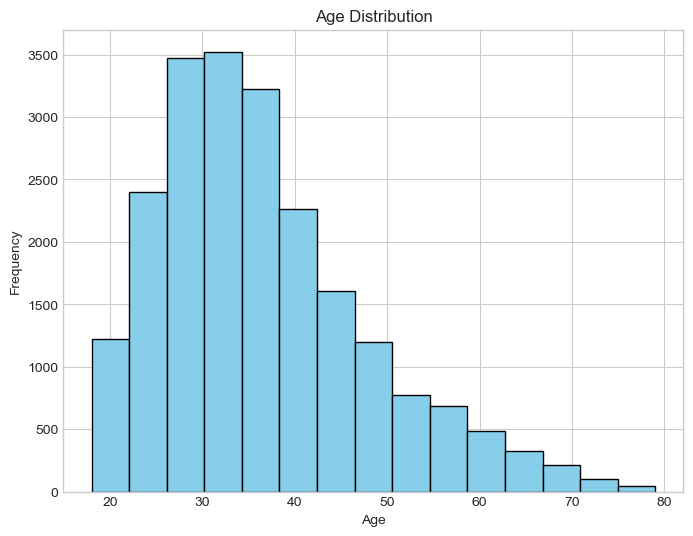

In [10]:
plt.style.use("seaborn-whitegrid")

# 1. Age Distribution
plt.figure(figsize=(8, 6))
df['age'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


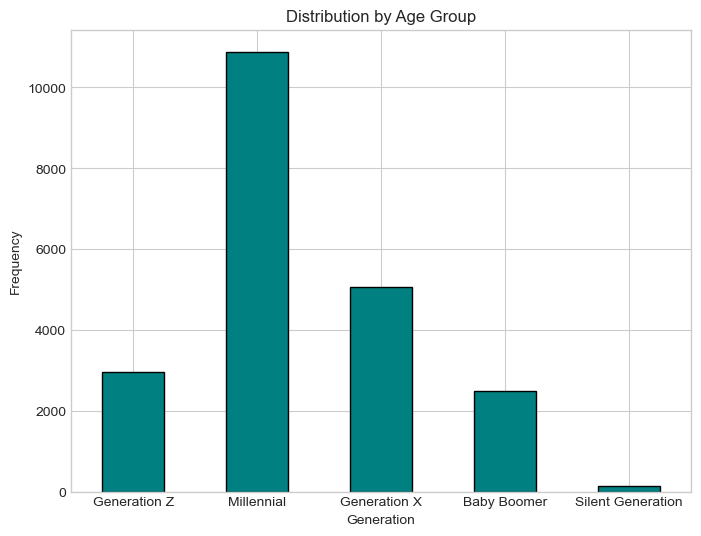

In [11]:
order = ['Generation Z', 'Millennial', 'Generation X', 'Baby Boomer', 'Silent Generation']
counts = df['age_gen'].value_counts().reindex(order)

# Plotting the bar chart with the specified order
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribution by Age Group')
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


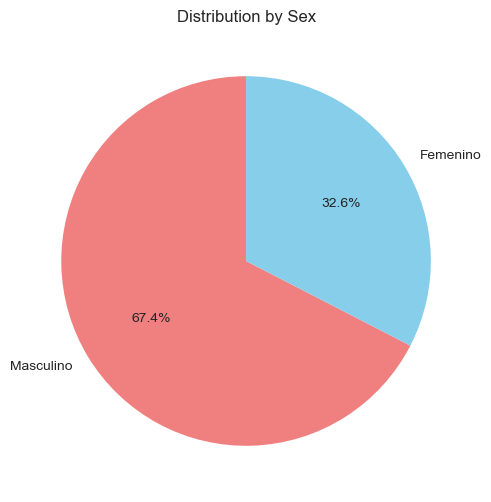

In [13]:
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribution by Sex')
plt.ylabel('')
plt.show()



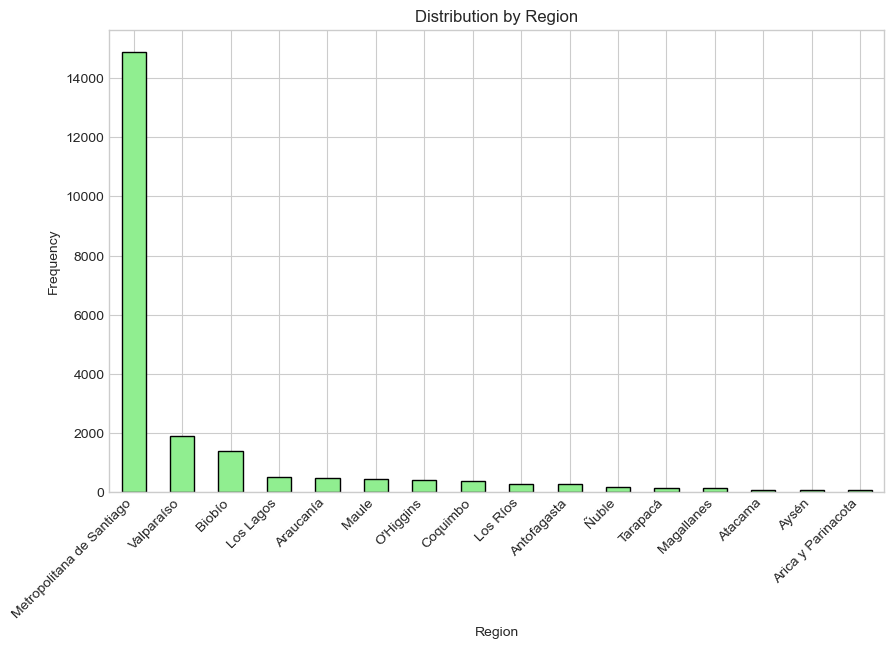

In [14]:
plt.figure(figsize=(10, 6))
df['region'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


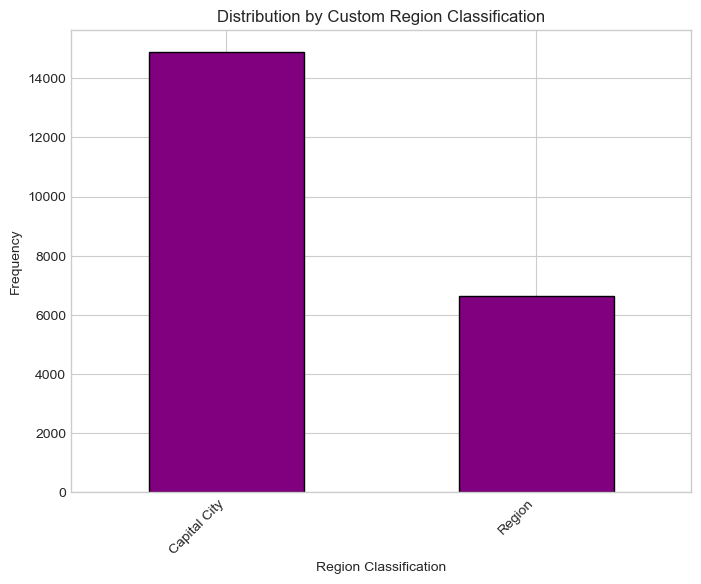

In [15]:
plt.figure(figsize=(8, 6))
df['region_custom'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Distribution by Custom Region Classification')
plt.xlabel('Region Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


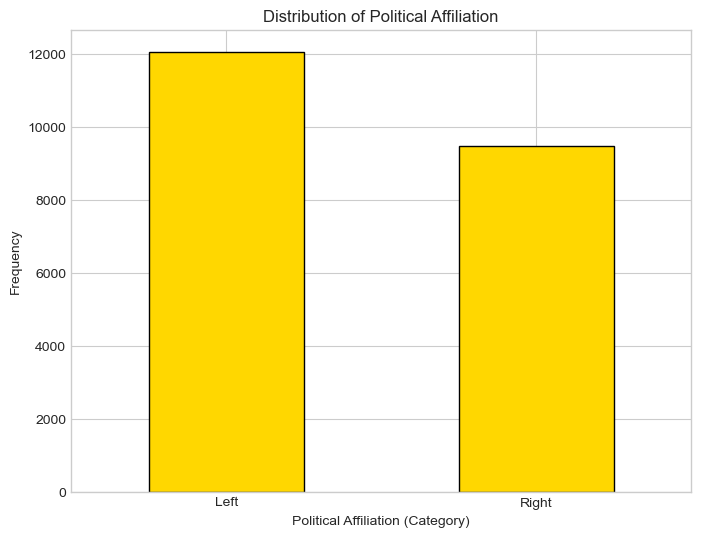

In [16]:
order = ['Left', 'Right']
counts = df['Binary_Classification'].value_counts().reindex(order)

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Distribution of Political Affiliation')
plt.xlabel('Political Affiliation (Category)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


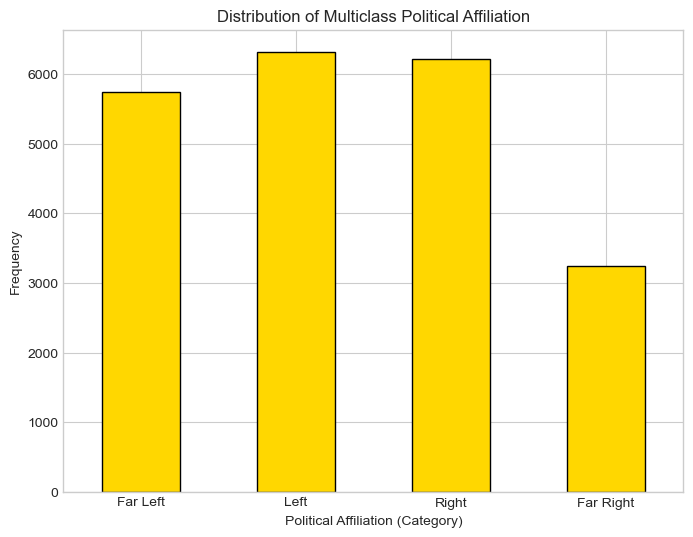

In [17]:
order = ['Far Left', 'Left', 'Right', 'Far Right']
counts = df['Multiclass'].value_counts().reindex(order)

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Distribution of Multiclass Political Affiliation')
plt.xlabel('Political Affiliation (Category)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# 6. Supervised Machine Learning – Preprocessing


In [18]:
df_model = df.drop(columns=["region",'age_gen','politica','ID'])
df_model.head()

,sex,age,region_custom,z1,z2,Binary_Classification,Multiclass
0,Masculino,27,Region,0.572108,0.215063,Left,Far Left
1,Masculino,43,Capital City,0.633335,0.264999,Right,Right
2,Femenino,39,Capital City,0.499945,0.462515,Left,Left
3,Masculino,34,Capital City,0.152297,0.382331,Right,Right
4,Femenino,37,Capital City,0.288385,0.269820,Left,Far Left


In [19]:
# Assign a binary value to the 'sex' column, replacing 'Female' with 0 and 'Male' with 1.
df_model['sex'] = df_model['sex'].replace({'Femenino': 0, 'Masculino': 1})

In [20]:
df_model['region_custom'] = df_model['region_custom'].replace({'Region': 0, 'Capital City': 1})

In [21]:
df_model.head()

,sex,age,region_custom,z1,z2,Binary_Classification,Multiclass
0,1,27,0,0.572108,0.215063,Left,Far Left
1,1,43,1,0.633335,0.264999,Right,Right
2,0,39,1,0.499945,0.462515,Left,Left
3,1,34,1,0.152297,0.382331,Right,Right
4,0,37,1,0.288385,0.269820,Left,Far Left


In [22]:
df_model[['sex','age','region_custom']].describe()

,sex,age,region_custom
count,21528.000000,21528.000000,21528.000000
mean,0.674285,36.708751,0.691843
std,0.468652,11.140458,0.461742
min,0.000000,18.000000,0.000000
25%,0.000000,29.000000,0.000000
50%,1.000000,35.000000,1.000000
75%,1.000000,43.000000,1.000000
max,1.000000,79.000000,1.000000


# 7. Supervised Machine Learning – Binary Classification


In [24]:
df_model_binario = df_model.drop(columns=["Multiclass"])
df_model_binario.head()

,sex,age,region_custom,z1,z2,Binary_Classification
0,1,27,0,0.572108,0.215063,Left
1,1,43,1,0.633335,0.264999,Right
2,0,39,1,0.499945,0.462515,Left
3,1,34,1,0.152297,0.382331,Right
4,0,37,1,0.288385,0.269820,Left


In [27]:
df_model_binario['Binary_Classification'] = df_model_binario['Binary_Classification'].replace({'Left': 0, 'Right': 1})
df_model_binario.head()

,sex,age,region_custom,z1,z2,Binary_Classification
0,1,27,0,0.572108,0.215063,0
1,1,43,1,0.633335,0.264999,1
2,0,39,1,0.499945,0.462515,0
3,1,34,1,0.152297,0.382331,1
4,0,37,1,0.288385,0.269820,0


In [29]:
# Define X (features) and y (target)
X = df_model_binario[['sex', 'age', 'region_custom']]
y = df_model_binario["Binary_Classification"]

In [30]:
X

,sex,age,region_custom
0,1,27,0
1,1,43,1
2,0,39,1
3,1,34,1
4,0,37,1
...,...,...,...
21523,1,43,0
21524,1,36,1
21525,1,52,0
21526,0,31,0


In [31]:
y

0        0
1        1
2        0
3        1
4        0
        ..
21523    0
21524    1
21525    1
21526    0
21527    0
Name: Binary_Classification, Length: 21528, dtype: int64

# 8. Generalization and the Importance of Validation

A well-trained model should not only learn to make accurate predictions on the training data but also generalize well to new, unseen data. This concept is key to avoiding problems such as:

- **Overfitting:** When the model memorizes the training data but fails to generalize to new data.  
- **Underfitting:** When the model is too simple and fails to capture important patterns, resulting in poor performance on both training and validation data.  

To evaluate a model’s ability to generalize, two main approaches are used:

1. **In-Sample:** Evaluates the model’s performance using the training data. This measures how well the model fits the data it has already seen, but does not reflect its ability to generalize.  
2. **Out-of-Sample:** Evaluates the model on new data not used during training. This is crucial for assessing generalization capacity.  

Splitting data into training, validation, and test sets helps measure these capabilities. The following diagram illustrates this idea:


## Train-Test Split

One of the most common techniques to evaluate a machine learning model is to divide the dataset into two parts: training and testing.  
This technique, known as the Train-Test Split, ensures that the model is trained on one portion of the data and evaluated on a completely separate portion, allowing us to measure its ability to generalize.


<img src="Imagenes/Split_Train_Test.jpg" alt="Chollet, F., & Chollet, F. (2021). Deep learning with Python. Simon and Schuster![image.png](attachment:image.png)" width="600" height="400">

**Figure 5.12 Simple hold-out validation split. Chollet, F., & Chollet, F. (2021). Deep learning with Python. Simon and Schuster.**

Split the dataset into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Verificar las formas de los conjuntos divididos
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15069, 3)
Shape of X_test: (6459, 3)
Shape of y_train: (15069,)
Shape of y_test: (6459,)


# 9. Models


## 9.1. Support Vector Machine (SVM)


SVM (*Support Vector Machine*) is a supervised learning model whose main objective is to find the **optimal hyperplane** that separates the data into different classes.  
This hyperplane not only divides the classes but also maximizes the **margin** between them—i.e., the distance between the closest points of each class and the hyperplane.  
Below are the key concepts:

- **Hyperplane:** The decision boundary that separates the classes. In a two-dimensional problem, this is a line; in three dimensions, a plane; and in higher dimensions, a hyperplane.  
- **Margin:** The maximum distance between the hyperplane and the nearest points from each class, ensuring that the classes are well separated.  
- **Support Vectors:** The points closest to the hyperplane that determine the margin’s position and orientation. These points are critical in defining the optimal solution.  

The following visualization illustrates the hyperplane, margin, and support vectors:  
*<img src="Imagenes/SVC.jpg" alt="" width="600" height="400">*  

**SVM Visualization: Hyperplane, Margin, and Support Vectors. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning* (Vol. 112, p. 18). New York: Springer.**


### SVC Model Parameters

The SVM model in `scikit-learn` is implemented through `SVC` (*Support Vector Classifier*).  
This model offers great flexibility thanks to several key hyperparameters that control its behavior and adaptability to different types of data.

#### **1. Kernel (Linear vs. Non-Linear)**

The `kernel` parameter specifies the type of function used to transform the data and find the optimal hyperplane.  

- **`kernel='linear'`:** Uses a linear hyperplane to separate the classes. Suitable when the data is linearly separable. This type of model is simpler and computationally more efficient.  
- **`kernel='rbf'` or `kernel='poly'`:** Used for non-linearly separable data, where mapping to a higher-dimensional space is required. These allow for more complex decision boundaries.  

#### **2. Parameter `C`**

The `C` parameter controls the trade-off between maximizing the margin and minimizing classification errors.  

- **Low `C` value:** Allows for a wider margin but tolerates more misclassifications (i.e., some points may lie on the wrong side of the margin). This is useful when aiming for better generalization.  
- **High `C` value:** Heavily penalizes misclassifications, resulting in a tighter margin. However, this can increase the risk of overfitting.  



In [35]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [36]:
acc = metrics.accuracy_score(y_test, y_pred_svm)
acc

0.5502399752283635

## 9.2. Decision Tree (DT)


A Decision Tree is a supervised learning model that uses a hierarchical structure to make decisions based on a series of "yes/no" questions.  
It is one of the most interpretable and easy-to-understand algorithms in Machine Learning. Decision Trees can be used for both classification and regression problems.  

#### Key Concepts:

- **Hierarchical Structure:** The model is organized like a tree, where:  
  - **Internal nodes** represent decisions based on features.  
  - **Branches** represent the possible outcomes of a decision.  
  - **Leaves** represent final predictions (classes or values).  

- **Data Splitting:** At each node, the dataset is split according to a feature and a threshold that best separates the classes or predicts the target value.  

- **Feature Splits:** Thresholds are chosen to minimize an error criterion, such as node entropy (for classification) or **mean squared error** (for regression).  

#### Example of a Decision Tree:

*<img src="Imagenes/DT1.jpg" alt="" width="600" height="400">*  
Decision boundaries of a tree with one depth level (left) and its representation as a decision tree (right).  

*<img src="Imagenes/DT2.jpg" alt="" width="600" height="400">*  
Decision boundaries of a tree with two depth levels (left) and its representation as a decision tree (right).  

**Müller, A. C., & Guido, S. (2016). *Introduction to Machine Learning with Python: A Guide for Data Scientists.* O’Reilly Media.**


### Key Parameters of the Decision Tree Model

Decision Trees, implemented in `scikit-learn` through `DecisionTreeClassifier` (for classification) and `DecisionTreeRegressor` (for regression), include several hyperparameters that control their behavior and help prevent issues such as **overfitting**.

#### **1. Maximum Depth (`max_depth`)**
- This parameter limits the number of splits in the tree, controlling its size and complexity.  
- **Low depth:** Results in a simple model with limited fitting capacity (risk of underfitting).  
- **High depth:** Allows the tree to fit more closely to the data but may lead to overfitting.  

#### **2. Splitting Criterion (`criterion`)**
- Defines how the quality of splits at each node is measured.  
  - **`gini`:** Minimizes Gini impurity in the nodes (default for classification).  
  - **`entropy`:** Maximizes information gain at each split.  
  - **`mse`:** Mean Squared Error, used for regression problems.  


In [37]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

In [38]:
acc = metrics.accuracy_score(y_test, y_pred_dt)
acc

0.552717138875987

## 9.3. Random Forest (RF)


**Random Forest** is a supervised learning model based on the concept of **ensembles** (combined models), which uses multiple decision trees to improve accuracy, reduce **overfitting**, and increase generalization ability.  
This method is widely used for both **classification** and **regression** problems due to its robustness, flexibility, and ease of use.  

#### How Does Random Forest Work?

1. **Building the Forest**:  
   - Random Forest generates multiple **decision trees** from different subsets of the original dataset. These subsets are obtained using a method called **bootstrap sampling** (sampling with replacement).  
   - To construct each tree, a random subset of features is selected at each node, which introduces diversity and reduces correlation among the trees.  

2. **Prediction**:  
   - In **classification**, the model outputs the class with the most votes across all trees (majority voting).  
   - In **regression**, it calculates the average of the predictions from all trees.  

*<img src="Imagenes/RF1.jpg" alt="" width="300" height="500">*  

**Yang, P., Hwa Yang, Y., Zhou, B., & Zomaya, A. Y. (2010). A review of ensemble methods in bioinformatics. *Current Bioinformatics, 5*(4), 296–308.**  

*<img src="Imagenes/RF2.jpg" alt="" width="600" height="400">*  

**Müller, A. C., & Guido, S. (2016). *Introduction to Machine Learning with Python: A Guide for Data Scientists.* O’Reilly Media.**


### Key Parameters of Random Forest

#### **1. Number of Trees (`n_estimators`)**
- This parameter determines how many decision trees will be created in the model.  
- A higher number of trees usually improves accuracy, but also increases training and prediction time.  

#### **2. Maximum Number of Features (`max_features`)**
- Specifies how many features to consider when looking for the best split at each node.  
  - **`sqrt` (default for classification):** Uses the square root of the total number of features.  
  - **`log2`:** Uses the base-2 logarithm of the total number of features.  
  - **Integer value:** Uses a fixed number of features.  
- Limiting the number of features helps reduce correlation among the trees, improving their ability to generalize.  

#### **3. Maximum Depth of Trees (`max_depth`)**
- Controls the maximum size of each tree, preventing them from growing too large and overfitting the data.  




In [39]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=4, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [33]:
acc = metrics.accuracy_score(y_test, y_pred_rf)
acc

0.5606130980027868

## 9.4 Evaluation of Classification Models


## Confusion Matrix and Performance Metrics

The **confusion matrix** is an essential tool for evaluating how a machine learning model is performing, especially in classification tasks.  
It provides a clear representation of the model’s predictions compared to the actual values (*Ground Truth*).

## Structure of the Confusion Matrix

The confusion matrix has four main components:

| Predicted / Ground Truth | Positive (+)         | Negative (-)         |
|---------------------------|----------------------|----------------------|
| **Positive (+)**          | True Positive (TP)   | False Positive (FP)  |
| **Negative (-)**          | False Negative (FN)  | True Negative (TN)   |

- **True Positive (TP):** Correct predictions of the positive class.  
- **True Negative (TN):** Correct predictions of the negative class.  
- **False Positive (FP):** Incorrect predictions where the model classifies as positive but it is actually negative.  
- **False Negative (FN):** Incorrect predictions where the model classifies as negative but it is actually positive.  

## Performance Metrics

### **1. Accuracy (Overall Correctness)**
Measures the proportion of correct predictions out of all predictions made by the model.  

### **2. Precision (Positive Predictive Value)**
Indicates the proportion of correct positive predictions among all positive predictions made by the model.  

### **3. Recall (Sensitivity or True Positive Rate)**
Measures the proportion of correctly predicted positives out of all actual positive cases.  

### **4. ROC (Receiver Operating Characteristic)**
A curve that represents the relationship between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** across different thresholds.  
It helps us understand the model’s behavior under varying decision points.  

### **5. AUC (Area Under the ROC Curve)**
The area under the ROC curve. It measures the model’s ability to distinguish between positive and negative classes.  
A value close to 1 indicates better performance.  


<img src="Imagenes/CM.jpg" alt="" width="797" height="500">

**Jeppesen, J. H., Jacobsen, R. H., Inceoglu, F., & Toftegaard, T. S. (2019). A cloud detection algorithm for satellite imagery based on deep learning. Remote sensing of environment, 229, 247-259.**

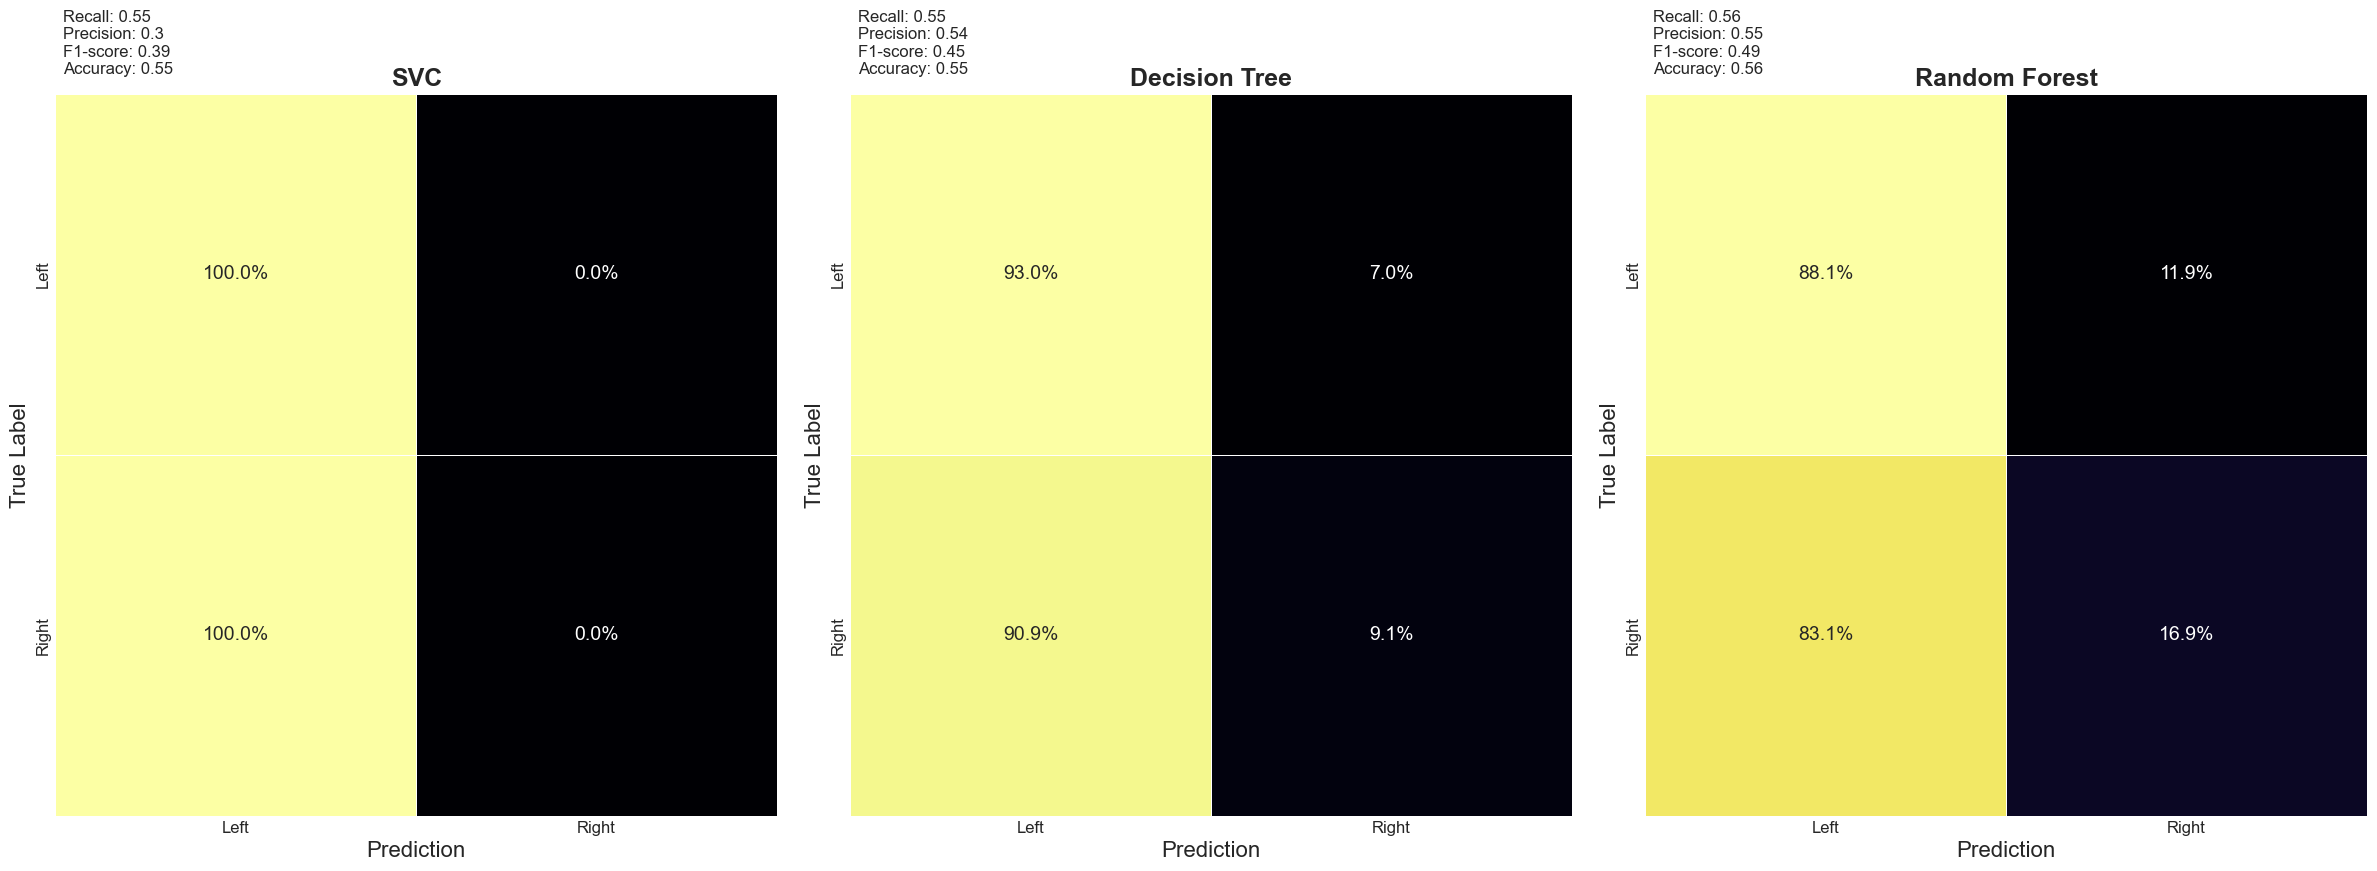

In [40]:
# List of models and their predictions
model_names = ['SVC', 'Decision Tree', 'Random Forest']
predictions = [y_pred_svm, y_pred_dt, y_pred_rf]  # Predictions in the correct order
true_labels = y_test  # True labels (common for all models)

# Problem classes (adjust according to actual classes)
classes = ['Left', 'Right']

# Set the figure size with subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns

# Generate confusion matrices for each model
for ax, model_name, y_pred in zip(axes, model_names, predictions):
    # Calculate metrics
    recall = recall_score(true_labels, y_pred, average='weighted')
    precision = precision_score(true_labels, y_pred, average='weighted')
    f1 = f1_score(true_labels, y_pred, average='weighted')
    acc = accuracy_score(true_labels, y_pred)

    # Create the confusion matrix
    matrix = confusion_matrix(true_labels, y_pred, normalize='true')

    # Plot the confusion matrix on the corresponding subplot
    sns.heatmap(matrix, annot=True, fmt='.1%', linewidths=0.5, square=True, cmap='inferno',
                xticklabels=classes, yticklabels=classes, cbar=False, annot_kws={'size': 14}, ax=ax)

    # Labels and title
    ax.set_title(f'{model_name}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Prediction', fontsize=16)
    ax.set_ylabel('True Label', fontsize=16)

    # Add metrics as text
    metrics_text = f'Recall: {round(recall, 2)}\nPrecision: {round(precision, 2)}\nF1-score: {round(f1, 2)}\nAccuracy: {round(acc, 2)}'
    ax.text(0.01, 1.07, metrics_text, va='center', transform=ax.transAxes, fontsize=12)

    # Adjust tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()



--------------------------------------------------

# 10. Feature Engineering

Include the dimensions


In [42]:
# Define X (features) and y (target)
X1 = df_model_binario[['sex', 'age', 'region_custom', 'z1', 'z2']]
y1 = df_model_binario["Binary_Classification"]


In [43]:
X1

,sex,age,region_custom,z1,z2
0,1,27,0,0.572108,0.215063
1,1,43,1,0.633335,0.264999
2,0,39,1,0.499945,0.462515
3,1,34,1,0.152297,0.382331
4,0,37,1,0.288385,0.269820
...,...,...,...,...,...
21523,1,43,0,0.354627,0.618174
21524,1,36,1,0.647223,0.204849
21525,1,52,0,0.815150,0.297094
21526,0,31,0,0.377025,0.308526


We will repeat the same workflow


In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [45]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train1, y_train1)
y_pred_svm1 = svm_model.predict(X_test1)

In [46]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model on the training data
dt_model.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_dt1 = dt_model.predict(X_test1)

In [47]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=4, random_state=42)

# Train the model on the training data
rf_model.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_rf1 = rf_model.predict(X_test1)

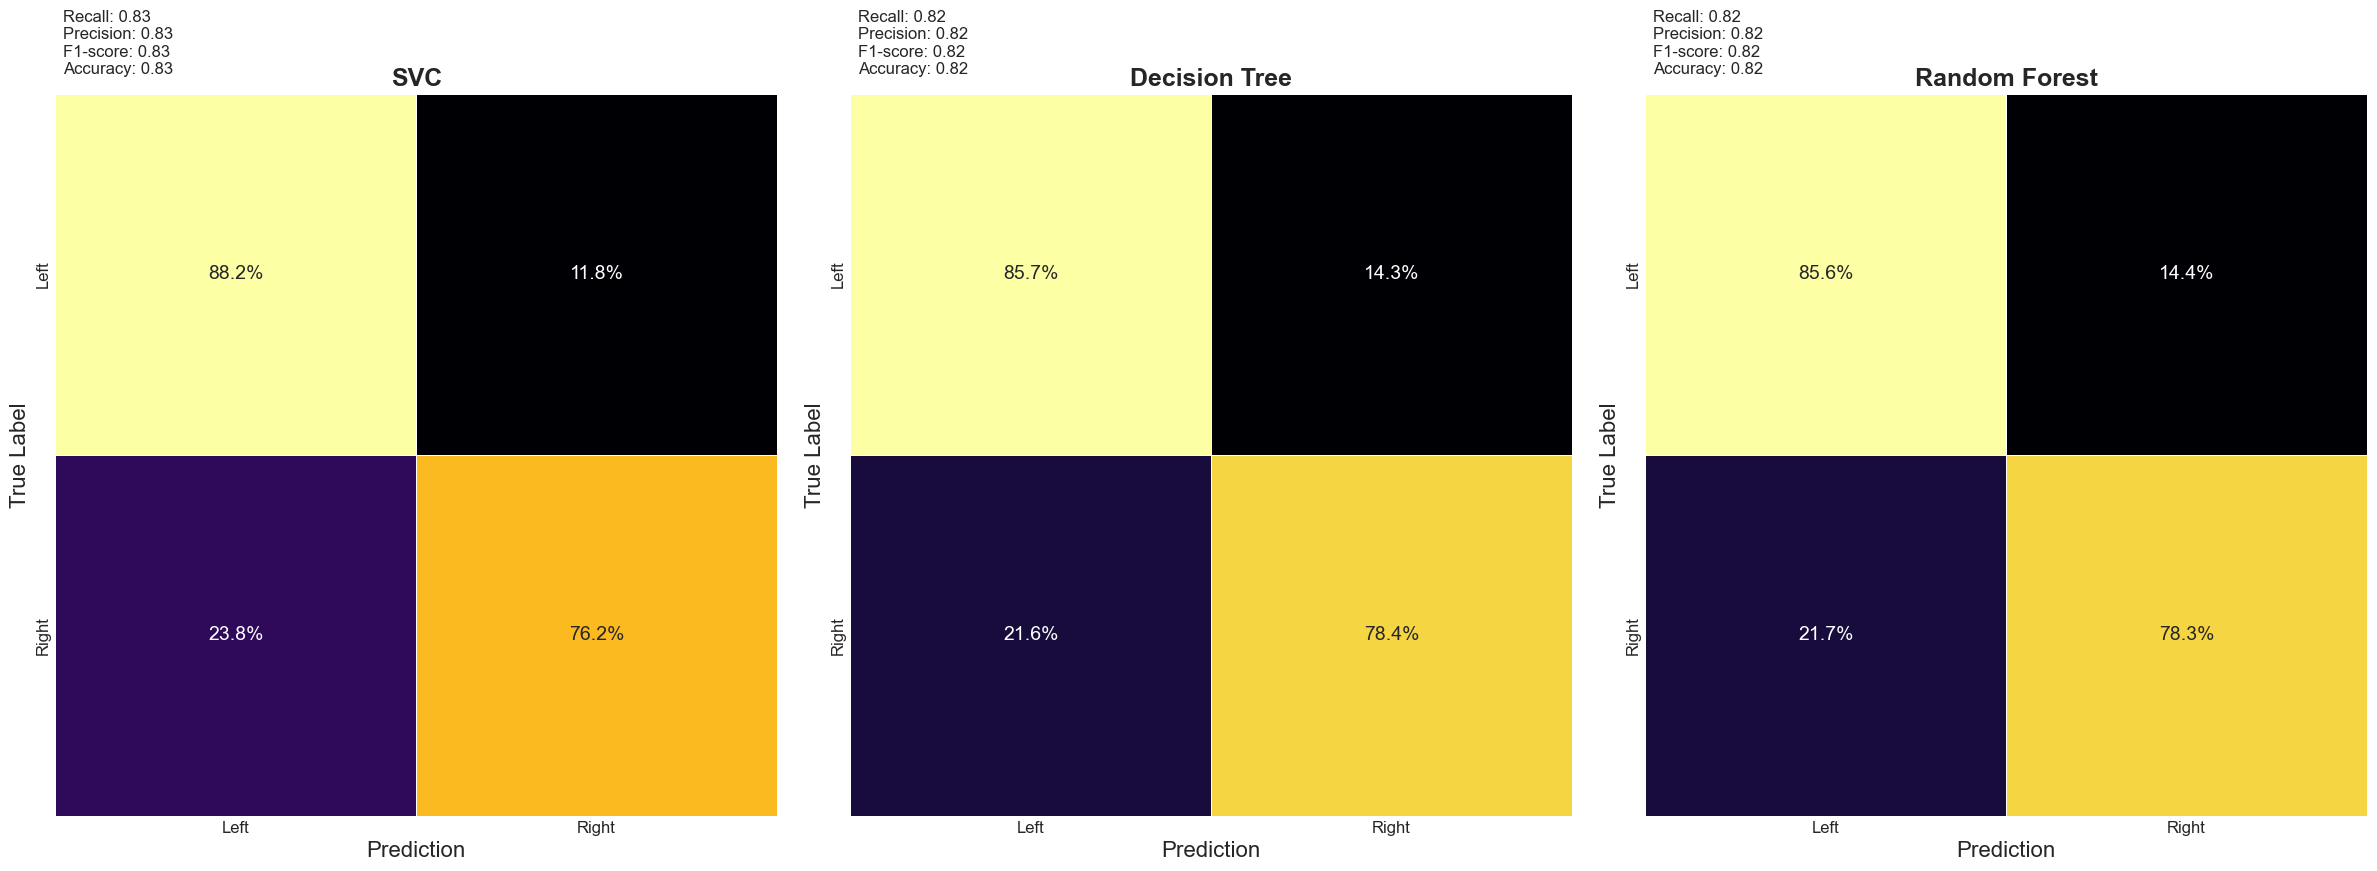

In [48]:
# List of models and their predictions
model_names = ['SVC', 'Decision Tree', 'Random Forest']
predictions = [y_pred_svm1, y_pred_dt1, y_pred_rf1]  # Predictions in the correct order
true_labels = y_test1  # True labels (common for all models)

# Problem classes (adjust according to actual classes)
classes = ['Left', 'Right']

# Configure the figure size with subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns

# Generate confusion matrices for each model
for ax, model_name, y_pred in zip(axes, model_names, predictions):
    # Calculate metrics
    recall = recall_score(true_labels, y_pred, average='weighted')
    precision = precision_score(true_labels, y_pred, average='weighted')
    f1 = f1_score(true_labels, y_pred, average='weighted')
    acc = accuracy_score(true_labels, y_pred)

    # Create the confusion matrix
    matrix = confusion_matrix(true_labels, y_pred, normalize='true')

    # Plot the confusion matrix on the corresponding subplot
    sns.heatmap(matrix, annot=True, fmt='.1%', linewidths=0.5, square=True, cmap='inferno',
                xticklabels=classes, yticklabels=classes, cbar=False, annot_kws={'size': 14}, ax=ax)

    # Labels and title
    ax.set_title(f'{model_name}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Prediction', fontsize=16)
    ax.set_ylabel('True Label', fontsize=16)

    # Add metrics as text
    metrics_text = f'Recall: {round(recall, 2)}\nPrecision: {round(precision, 2)}\nF1-score: {round(f1, 2)}\nAccuracy: {round(acc, 2)}'
    ax.text(0.01, 1.07, metrics_text, va='center', transform=ax.transAxes, fontsize=12)

    # Adjust tick label size
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


## ROC & AUC

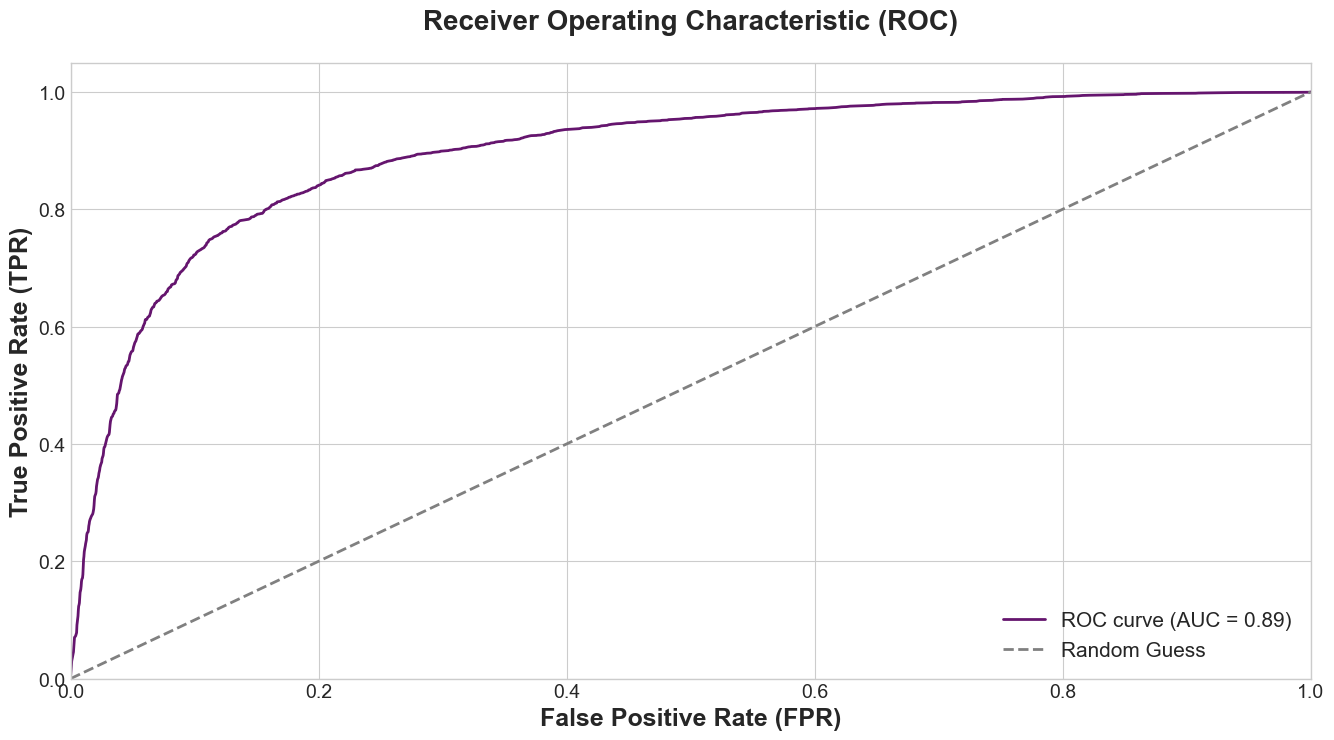

In [49]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for the model
fpr, tpr, thresholds = roc_curve(y_test1, rf_model.predict_proba(X_test1)[:, 1])
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Plot the ROC curve
sns.lineplot(x=fpr, y=tpr, color=sns.color_palette('inferno')[1], lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')

# Configure the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=18, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=18, fontweight='bold')
ax.set_title("Receiver Operating Characteristic (ROC)", pad=24, fontweight='bold', fontsize=20)
plt.legend(loc='lower right', fontsize=15)

# Adjust axis tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()


# Principal Component Analysis (PCA) 

Principal Component Analysis (PCA) is an unsupervised machine learning technique.  
It is a dimensionality reduction method mainly used to identify patterns in the data and reduce complexity by transforming them into a set of linearly uncorrelated variables called principal components.


In [51]:
# Define X (features) and y (target)
X2 = df_model_binario[['sex', 'age', 'region_custom', 'z1', 'z2']]
y2 = df_model_binario["Binary_Classification"]


In [52]:
# Define the columns for PCA
columns_for_pca = ['z1', 'z2']

# Create the PCA model and fit it to the data
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X2[columns_for_pca])

# Add the first principal component as a new column
X2['PCA1'] = X_pca

# Drop the original z1 and z2 columns
X2 = X2.drop(columns=columns_for_pca)


In [53]:
X2.head()

,sex,age,region_custom,PCA1
0,1,27,0,0.066203
1,1,43,1,0.127622
2,0,39,1,-0.005003
3,1,34,1,-0.352959
4,0,37,1,-0.217306


In [54]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [55]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=4, random_state=42)

# Train the model on the training data
rf_model.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred_rf2 = rf_model.predict(X_test2)

In [56]:
acc = metrics.accuracy_score(y_test, y_pred_rf2)
acc

0.8252051401145688

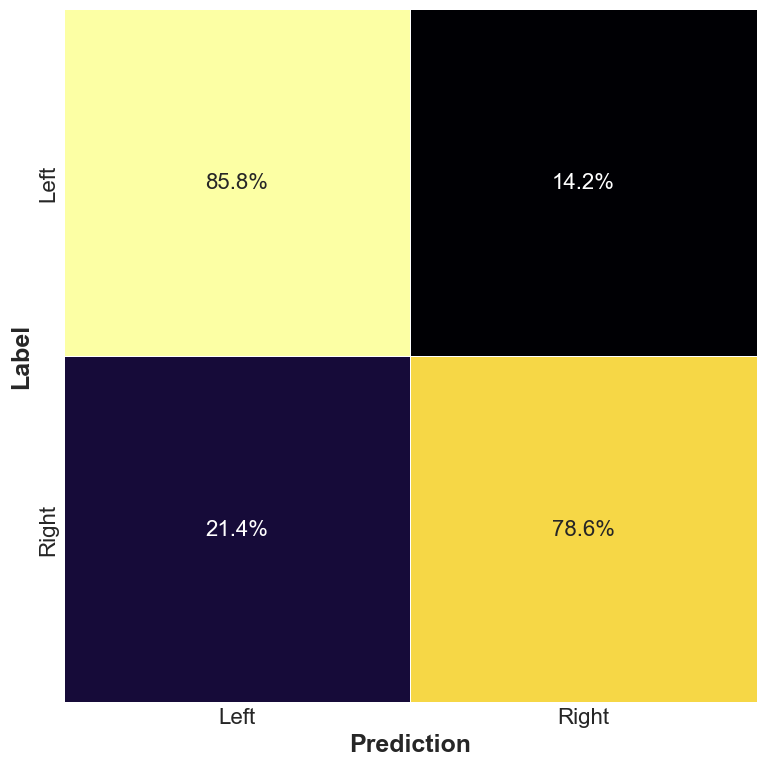

In [57]:
# Creación de la matriz de confusión
plt.figure(figsize=(9, 9))
matriz = confusion_matrix(y_test, y_pred_rf2, normalize='true')
classes = ['Left', 'Right']
sns.heatmap(matriz, annot=True, fmt='.1%', linewidths=0.5, square=True, cmap='inferno', xticklabels=classes, yticklabels=classes, cbar=False,annot_kws={'size': 16})
plt.ylabel('Label', fontsize=18, fontweight='bold')
plt.xlabel('Prediction', fontsize=18, fontweight='bold')
all_sample_title = 'dim 2'
#plt.title(all_sample_title, size=15, fontweight='bold')

# Ajuste del tamaño de letra para las métricas
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Guardar la figura en la ruta 'figuras' con un título conveniente

plt.show()

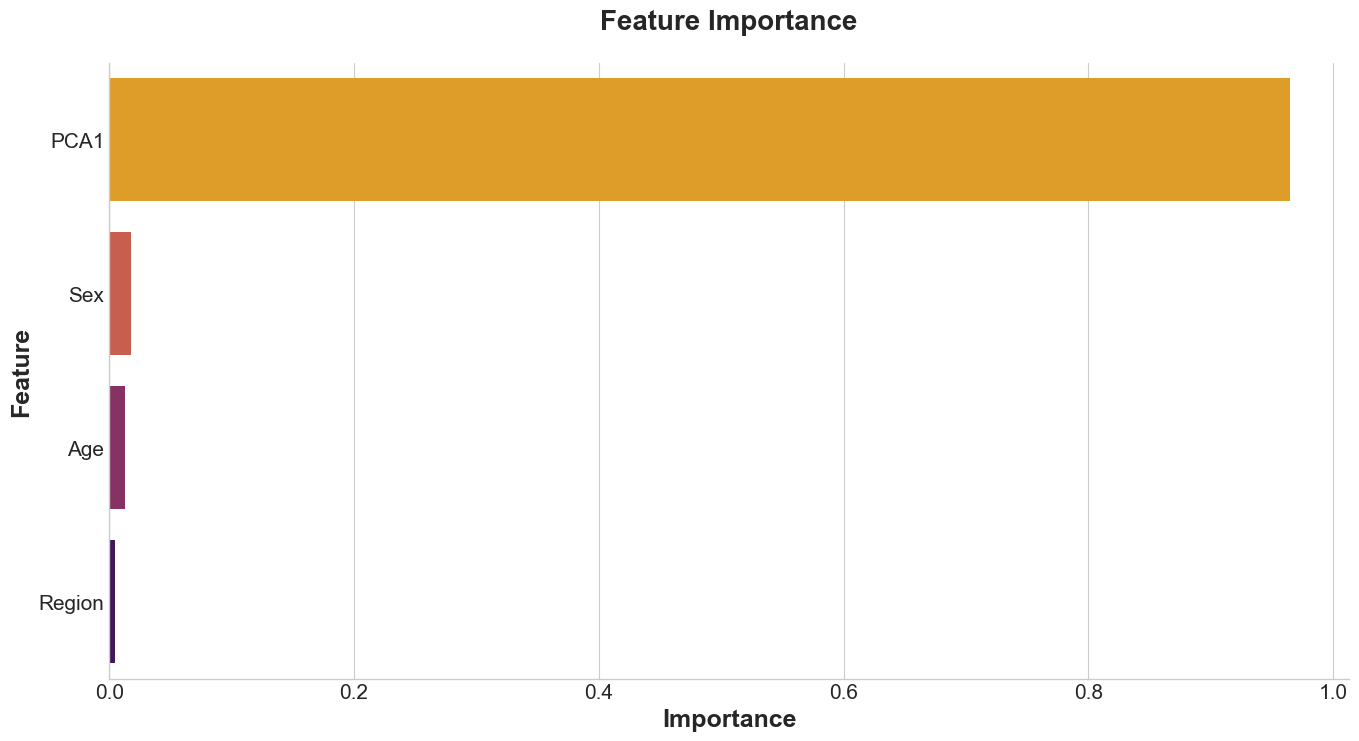

In [58]:
def hide_border(ax):
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


# Assuming you have your feature importances and feature names
feature_importances = rf_model.feature_importances_
feature_names = ['Sex', 'Age', 'Region', 'PCA1']

# Get the sorted indices (descending order)
sorted_indices = np.argsort(feature_importances)  # Descending order

# Reorder feature names and feature importances according to the sorted indices
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

# Create a bar plot to show the sorted feature importances
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
colors = sns.color_palette('inferno', len(sorted_feature_importances))  # Get colors from the 'inferno' palette
sns.barplot(y=sorted_feature_names, x=sorted_feature_importances, palette=colors, ax=ax)
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names, fontsize=15)
plt.xlabel('Importance', fontsize=18, fontweight='bold')
plt.ylabel('Feature', fontsize=18, fontweight='bold')
plt.setp(ax.get_xticklabels(), fontsize=15)
ax.set_title("Feature Importance", pad=24, fontweight=700, fontsize=20)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gca().invert_yaxis()  # Invert the y-axis so the most important features appear at the top
plt.show()
